In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis, euclidean
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target

print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of target matrix (Y): {Y.shape}")

Shape of feature matrix (X): (150, 4)
Shape of target matrix (Y): (150,)


<h3> <b> My implementation

In [ ]:
C = np.cov(X, rowvar=False)

In [ ]:
def get_euclidean_distance_matrix(X):

    D = np.zeros(shape=(X.shape[0], X.shape[0]))

    for i in range(X.shape[0]):

        for j in range(X.shape[0]):

            D[i, j] = euclidean(X[i, :], X[j, :])

    return D

def get_mahalanobis_distance_matrix(X, C):

    D = np.zeros(shape=(X.shape[0], X.shape[0]))

    for i in range(X.shape[0]):

        for j in range(X.shape[0]):

            D[i, j] = mahalanobis(X[i, :], X[j, :], C)

    return D

In [ ]:
mah_dm = get_mahalanobis_distance_matrix(X, C)
euc_dm = get_euclidean_distance_matrix(X)

In [ ]:
mah_dm_ixs_sort = np.argsort(mah_dm, axis=1)
euc_dm_ixs_sort = np.argsort(euc_dm, axis=1)

In [ ]:
def knn(X, Y, kmin, kmax, sorted_ixs):

    k_range = list(range(kmin, kmax + 1, 1))
    k_scores = []
    preds = np.zeros(shape=Y.shape)

    for k in k_range:

        for i in range(X.shape[0]):

            k_nearest_ixs = sorted_ixs[i, :k]
            k_nearest_classes = Y[k_nearest_ixs]
            values, counts = np.unique(k_nearest_classes, return_counts=True)
            preds[i] = values[np.argmax(counts)]

        acc = np.sum(Y == preds) / Y.shape[0]
        k_scores.append(acc)

    return k_range, k_scores

In [ ]:
k_range, k_scores_mah = knn(X, Y, 1, 10, mah_dm_ixs_sort)
k_range, k_scores_euc = knn(X, Y, 1, 10, euc_dm_ixs_sort)

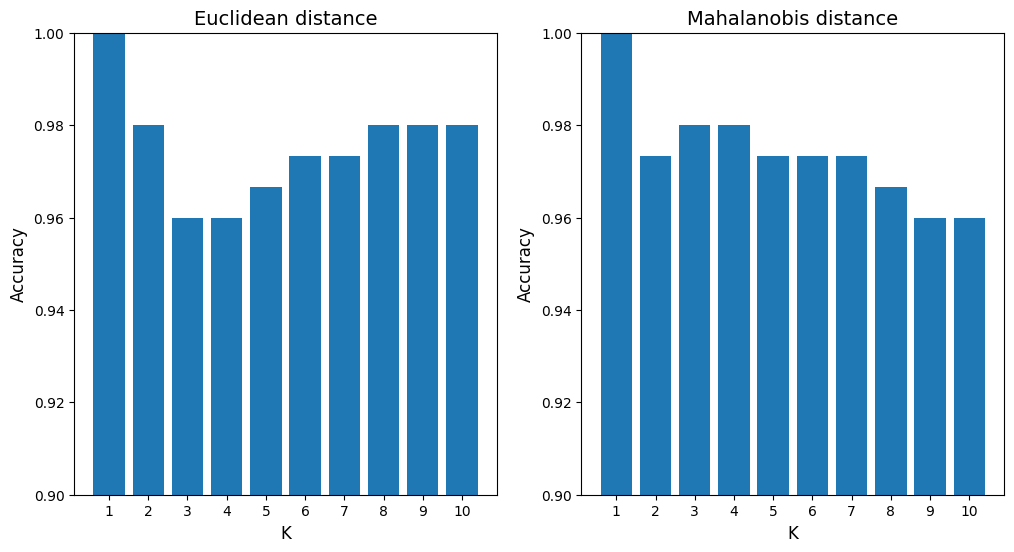

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(k_range, k_scores_euc)
ax[0].set_ylim(0.9, 1)
ax[0].set_xticks(k_range)
ax[0].set_xlabel("K", fontsize=12)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].set_title("Euclidean distance", fontsize=14)

ax[1].bar(k_range, k_scores_mah)
ax[1].set_ylim(0.9, 1)
ax[1].set_xticks(k_range)
ax[1].set_xlabel("K", fontsize=12)
ax[1].set_ylabel("Accuracy", fontsize=12)
ax[1].set_title("Mahalanobis distance", fontsize=14)

plt.show()

<h3> <b> Scikit-learn implementation

In [ ]:
def knn_sklearn(X, Y, kmin, kmax, metric, metric_params):

    k_range = list(range(kmin, kmax + 1, 1))
    k_scores = []

    for k in k_range:

        knn_cl = KNeighborsClassifier(n_neighbors=k,
                                      metric=metric,
                                      metric_params=metric_params)

        knn_cl.fit(X, Y)

        acc = knn_cl.score(X, Y)
        k_scores.append(acc)

    return k_range, k_scores

In [ ]:
k_range, k_scores_euc_sk = knn_sklearn(X, Y, 1, 10, euclidean, None)
k_range, k_scores_mah_sk = knn_sklearn(X, Y, 1, 10, mahalanobis, {"VI": C})

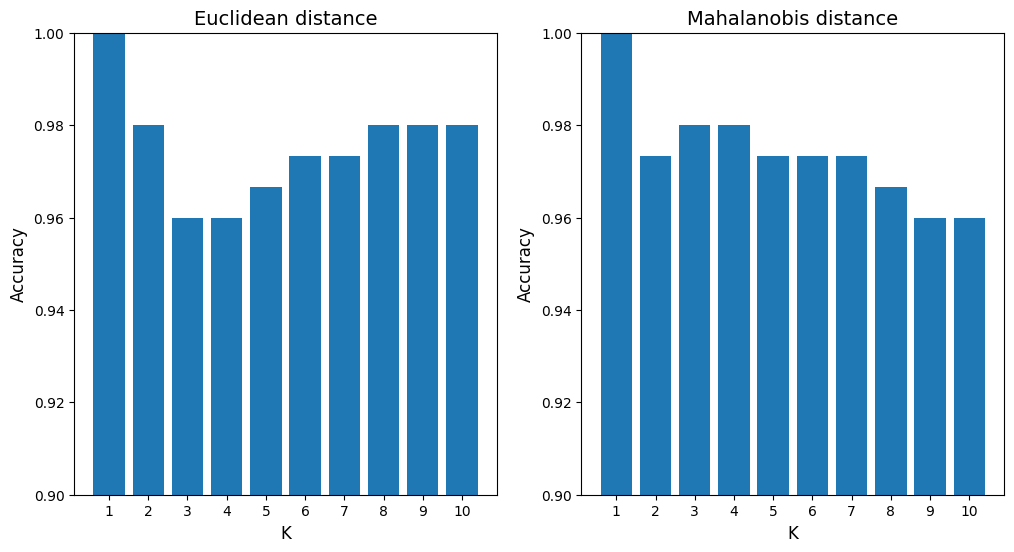

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(k_range, k_scores_euc_sk)
ax[0].set_ylim(0.9, 1)
ax[0].set_xticks(k_range)
ax[0].set_xlabel("K", fontsize=12)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].set_title("Euclidean distance", fontsize=14)

ax[1].bar(k_range, k_scores_mah_sk)
ax[1].set_ylim(0.9, 1)
ax[1].set_xticks(k_range)
ax[1].set_xlabel("K", fontsize=12)
ax[1].set_ylabel("Accuracy", fontsize=12)
ax[1].set_title("Mahalanobis distance", fontsize=14)

plt.show()